

1st Circuit



In [52]:
import pennylane as qml
from pennylane import numpy as np

In [120]:
noise_gate = qml.AmplitudeDamping
noise_strength = 0.1

dev = qml.device("default.mixed", wires = 4)
dev_noisy = qml.transforms.insert(dev,noise_gate, noise_strength)


In [121]:
# @qml.qnode(dev)
qml.drawer.use_style('pennylane_sketch')
# np.random.seed(1967)

def circuit():
    #for s in range(n):
    qml.PauliX(wires = 0)
    qml.CNOT(wires = [1,0])
    qml.PauliY(wires = 1)
    qml.PauliX(2)
    qml.PauliY(3)
    qml.CNOT([2,3])
    qml.SWAP([1,2])
    qml.PauliX(0)
        # qml.PauliX(wires = 0)
    return qml.expval(qml.PauliZ(wires = 0))

ideal_qnode = qml.QNode(circuit, dev)
noisy_qnode = qml.QNode(circuit, dev_noisy)

In [122]:
# s = circuit()
# print(s)

(<Figure size 700x500 with 1 Axes>, <Axes: >)


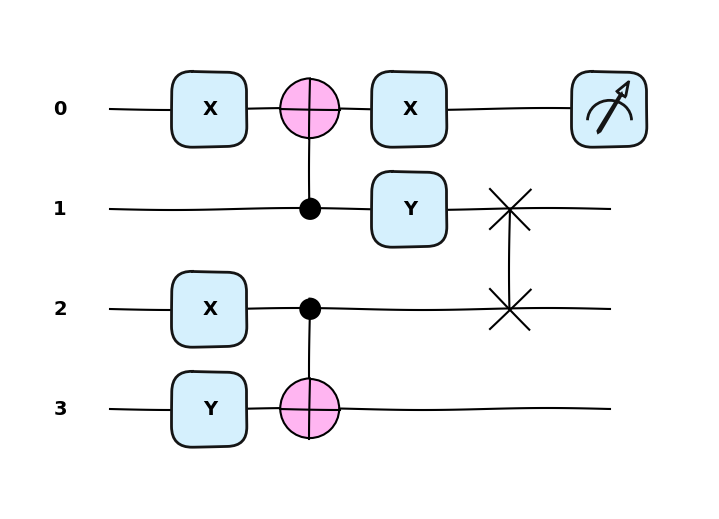

In [123]:
print(qml.draw_mpl(ideal_qnode, expansion_strategy="device")())

(<Figure size 1100x500 with 1 Axes>, <Axes: >)


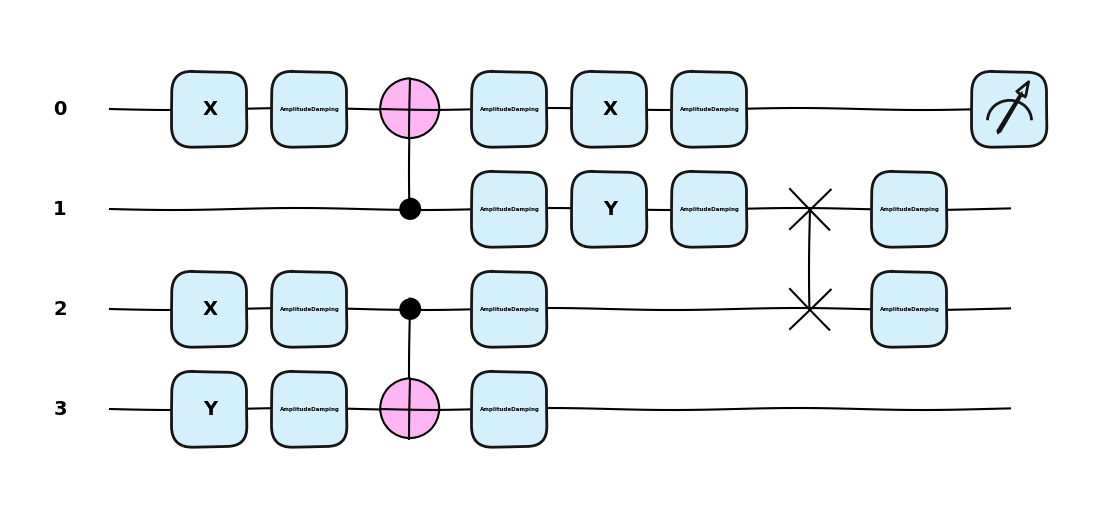

In [124]:
print(qml.draw_mpl(noisy_qnode, expansion_strategy="device")())

In [125]:
ideal_qnode()

tensor(1., requires_grad=True)

In [126]:
noisy_qnode()

tensor(0.658, requires_grad=True)

In [142]:
from mitiq.zne.scaling import fold_global
from mitiq.zne.inference import RichardsonFactory
from pennylane.transforms import mitigate_with_zne

extrapolate = RichardsonFactory.extrapolate
scale_factors = [1, 2, 3]

mitigated_qnode = mitigate_with_zne(noisy_qnode, scale_factors, fold_global, extrapolate)
mitigated_qnode()

tensor(0.59017196, requires_grad=True)



2nd Circuit



In [134]:
import pennylane as qml

#Creating a single qubit circuit which has "n" number of X gates and we are calculating the expectation value of Pauli Z. 
def circuit(n):
    for _ in range(n):
        qml.PauliX(wires=0)
    return qml.expval(qml.PauliZ(0))

In [135]:
#Adding Noise(Amplitude Damping) to the circuit
noise_strength = 0.05
dev_noise_free = qml.device("default.mixed", wires=1) #Noise free  or Ideal device
dev = qml.transforms.insert(dev_noise_free, qml.AmplitudeDamping, noise_strength) #Creating a noisy device 
device_circuit = qml.QNode(circuit, dev) #qnode for noisy device
device_noise_free_circuit = qml.QNode(circuit,dev_noise_free) #qnode for the ideal or noise free device

(<Figure size 2300x200 with 1 Axes>, <Axes: >)


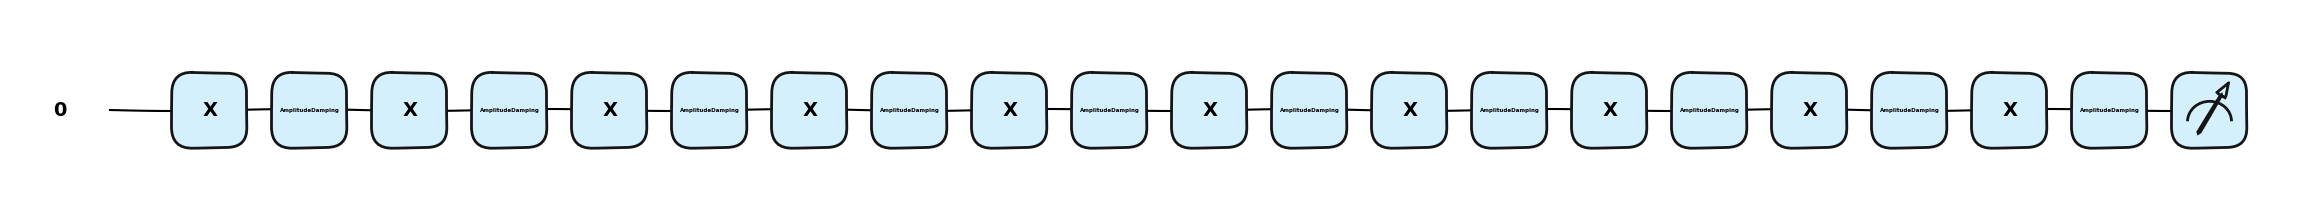

In [136]:
print(qml.draw_mpl(device_circuit, expansion_strategy="device")(10))

In [137]:
device_circuit(10)

tensor(0.60902574, requires_grad=True)

In [138]:
device_noise_free_circuit(10)

tensor(1., requires_grad=True)

In [139]:
# Error Mitigation with the help of ZNE.
from mitiq.zne.scaling import fold_global
from mitiq.zne.inference import RichardsonFactory
from pennylane.transforms import mitigate_with_zne

extrapolate = RichardsonFactory.extrapolate
scale_factors = [1, 2, 3] 

mitigated_qnode = mitigate_with_zne(device_circuit , scale_factors, fold_global, extrapolate) # qnode for the mitigated device

In [140]:
mitigated_qnode(10)

tensor(0.93704843, requires_grad=True)